## MAT 386E Homework III

**Uzay Karadağ | Hasan Çelik**


-----

Case Summary<a href="#Case-Summary" class="anchor-link">¶</a>
-------------------------------------------------------------

East-West Airlines is trying to learn more about its customers. Key
issues are their flying patterns, earning and use of frequent flyer
rewards, and use of the airline credit card. The task is to identify
customer segments via clustering. The file EastWestAirlines.xls contains
information on 4000 passengers who belong to an airline’s frequent flier
program. For each passenger the data include information on their
mileage history and on different ways they accrued or spent miles in the
last year. **The goal is to try to identify clusters of passengers that
have similar charactersitics for the purpose of targeting different
segments for different types of mileage offers.**

Please prepare a notebook including answers to each of the following
questions:

1.  Apply hierarchical clustering with Euclidean distance and complete
    linkage. How many clusters appear to be appropriate? (***25
    points***)

2.  Compare the cluster centroids to characterize the different clusters
    and try to give each cluster a label. (***20 points***)

3.  To check the stability of the clusters, remove a random 5% of the
    data (by taking a random sample of 95% of the records, namely 200
    records), and repeat the analysis. Does the same picture emerge? Use
    425 as the seed. (***10 points***)

4.  Use k-means algorithm with the number of clusters you found in part
    (a). Does the same picture emerge? (***25 points***)

5.  Which clusters would you target for offers, and what type of offers
    would you target to customers in that cluster? (***20 points***)

Below we provided you with a list of libraries that might be useful for
your case study. This list is only a sample of what you might need; you
are free to use any additional library serving your purpose.

**The homework is due Sunday, October 23 midnight.**

Data Description<a href="#Data-Description" class="anchor-link">¶</a>
---------------------------------------------------------------------

-   **Field Name**=ID\#; **Data Type**=NUMBER; **Description**=Unique ID

-   **Field Name**=Balance; **Data Type**=NUMBER; **Description**=Number
    of miles eligible for award travel

-   **Field Name**=Qual\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles counted as qualifying for Topflight
    status

-   **Field Name**=cc1\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with freq. flyer credit card
    in the past 12 months:

-   **Field Name**=cc2\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Rewards credit card in
    the past 12 months:

-   **Field Name**=cc3\_miles; **Data Type**=CHAR;
    **Description**=Number of miles earned with Small Business credit
    card in the past 12 months:

-   For cc1\_miles,cc2\_miles and cc3\_miles bins mean following ranges:

          - 1 = under 5,000
          - 2 = 5,000 - 10,000
          - 3 = 10,001 - 25,000
          - 4 = 25,001 - 50,000
          - 5 = over 50,000

-   **Field Name**=Bonus\_miles; **Data Type**=NUMBER;
    **Description**=Number of miles earned from non-flight bonus
    transactions in the past 12 months

-   **Field Name**=Bonus\_trans; **Data Type**=NUMBER;
    **Description**=Number of non-flight bonus transactions in the past
    12 months

-   **Field Name**=Flight\_miles\_12mo; **Data Type**=NUMBER;
    **Description**=Number of flight miles in the past 12 months

-   **Field Name**=Flight\_trans\_12; **Data Type**=NUMBER;
    **Description**=Number of flight transactions in the past 12 months

-   **Field Name**=Days\_since\_enroll; **Data Type**=NUMBER;
    **Description**=Number of days since Enroll\_date

-   **Field Name**=Award?; **Data Type**=NUMBER; **Description**=Dummy
    variable for Last\_award (1=not null, 0=null)

# Sample Libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Get Data

In [192]:
data = pd.read_excel('EastWestAirlines.xls', sheet_name='data')

In [193]:
data.shape

(3999, 12)

In [194]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [195]:
data.columns = data.columns.str.upper()
data.drop(columns=['ID', 'AWARD'], inplace=True)
data

,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [196]:
from sklearn.preprocessing import normalize

In [197]:
normalized_data = normalize(data)
normalized_data

array([[9.70414393e-01, 0.00000000e+00, 3.44815547e-05, ...,
        0.00000000e+00, 0.00000000e+00, 2.41370883e-01],
       [9.40208573e-01, 0.00000000e+00, 4.88572320e-05, ...,
        0.00000000e+00, 0.00000000e+00, 3.40437193e-01],
       [9.81113099e-01, 0.00000000e+00, 2.37247449e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.66879855e-01],
       ...,
       [9.44947533e-01, 0.00000000e+00, 3.85184532e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.80009571e-02],
       [9.99591676e-01, 0.00000000e+00, 1.82078303e-05, ...,
        9.10391515e-03, 1.82078303e-05, 2.55091703e-02],
       [9.07271293e-01, 0.00000000e+00, 3.00819394e-04, ...,
        0.00000000e+00, 0.00000000e+00, 4.20545513e-01]])

# Question 1

In [198]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [199]:
link = linkage(normalized_data, method='complete', metric='euclidean')

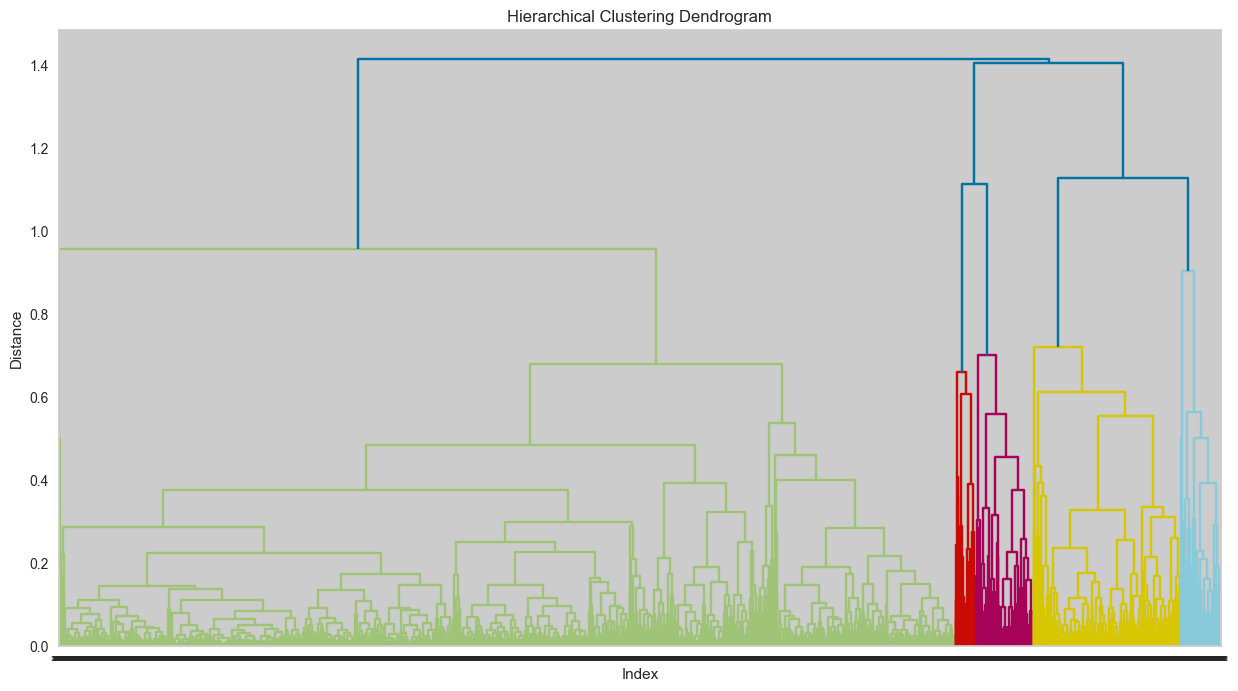

In [200]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(link, leaf_rotation = 0,  leaf_font_size = 5)  
plt.show()

From the dendrogram we find the optimal # of clusters for our model to be 5. Now we will construct our model using the *AgglomerativeClustering* method from the *sklearn.clustering* module.

In [201]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean').fit(normalized_data)
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
data['CLUSTER'] = model.labels_
data

,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL,CLUSTER
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


# Question 2

In [203]:
data.groupby(data.CLUSTER).size()

CLUSTER
0    3086
1     509
2     137
3     197
4      70
dtype: int64

In [204]:
data.groupby(data.CLUSTER).mean()

,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL
CLUSTER,,,,,,,,,,
0,85958.186325,163.835386,1.876215,1.012638,1.002916,13503.547959,11.000648,469.272197,1.402787,4043.470836
1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444
2,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774
3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569
4,1629.914286,0.000000,1.014286,1.000000,1.000000,652.228571,2.571429,42.142857,0.157143,4828.657143


Let's analyze the 5 clusters we just formed from these features.

- **CLLUSTER 0**: Customers in this cluster have the highest mean balance among all clusters even though they have been enrolled after the customers in other clusters on average. It is also the biggest cluster in terms of number of customers. This cluster can be described as the common man where most bonus miles are earned through qualifying miles.
  
- **CLUSTER 1**: Customers in this cluster have a much stronger tendency to earn miles through the frequent flyer credit card compared to other clusters. This can be inferred from the fact their CC1_MILES column mean is roughly 3.41 which is one of the two metrics where the 10,001-25,000 bin is the average. They also have the second largest balance mean.
  
- **CLUSTER 2**: This cluster is quite similar to Cluster 1 when you look at the dist. of sources of miles however this cluster differs from Cluster 1 as its mean balance is significantly lower.
  
- **CLUSTER 3**: This cluster is second last in terms of avg. balance. It can be characterized as old members but non-frequent flyers. Somewhat idle and old customers.
  
- **CLUSTER 4**: Similar to Cluster 3, this cluster also contains old members who are non-frequent flyers. But it is different because the mean qualifying miles average at a whooping low 0.

# Question 3

In [205]:
data_005 = data.sample(frac=0.05,random_state=425)
data_95 = data.drop(data_005.index)
data_005


,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL,CLUSTER
2252,235312,0,5,1,1,56685,16,0,0,3476,0
1161,33373,0,1,1,1,0,0,0,0,5427,0
3771,48296,0,3,1,1,31329,9,500,1,3061,1
3385,22048,0,1,1,1,100,1,0,0,1702,0
132,145074,0,1,1,1,8000,4,0,0,6746,0
...,...,...,...,...,...,...,...,...,...,...,...
3583,160114,500,1,1,1,71954,86,30817,53,1373,0
3305,22215,0,1,1,1,2375,12,0,0,1857,0
807,152063,0,4,1,1,34257,19,1100,3,6159,0
1776,96053,0,1,1,1,2200,6,2200,6,4391,0


In [206]:
data_95

,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL,CLUSTER
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [207]:
normalized_data = normalize(data_95)
normalized_data

array([[9.40208573e-01, 0.00000000e+00, 4.88572320e-05, ...,
        0.00000000e+00, 3.40437193e-01, 0.00000000e+00],
       [9.81113099e-01, 0.00000000e+00, 2.37247449e-05, ...,
        0.00000000e+00, 1.66879855e-01, 0.00000000e+00],
       [9.04428139e-01, 0.00000000e+00, 6.12092677e-05, ...,
        0.00000000e+00, 4.25526829e-01, 0.00000000e+00],
       ...,
       [9.44947533e-01, 0.00000000e+00, 3.85184532e-05, ...,
        0.00000000e+00, 1.80009571e-02, 0.00000000e+00],
       [9.99591676e-01, 0.00000000e+00, 1.82078303e-05, ...,
        1.82078303e-05, 2.55091703e-02, 0.00000000e+00],
       [9.07271293e-01, 0.00000000e+00, 3.00819394e-04, ...,
        0.00000000e+00, 4.20545513e-01, 0.00000000e+00]])

In [208]:
model = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean').fit(normalized_data)
data_95['CLUSTER'] = model.labels_
data_95

,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL,CLUSTER
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [209]:
data_95.groupby(data_95.CLUSTER).mean()

,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL
CLUSTER,,,,,,,,,,
0,83883.219063,166.243092,1.560673,1.008410,1.001602,8954.964758,9.286744,455.555066,1.385663,4078.088106
1,67019.069072,117.450515,3.291753,1.028866,1.030928,35948.643299,17.874227,465.725773,1.418557,4046.098969
2,18014.846591,80.761364,3.272727,1.017045,1.085227,43232.642045,17.585227,662.403409,1.869318,4412.869318
3,5105.511364,5.681818,1.011364,1.011364,1.000000,1131.000000,3.159091,42.715909,0.147727,4711.238636
4,1613.367647,0.000000,1.014706,1.000000,1.000000,671.411765,2.647059,43.382353,0.161765,4827.441176


The means of nearly every feature looks identical therefore we can safely assume that our clustering algorithm works stable as intended.

# Question 4

In [210]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans

KMeans(n_clusters=5)

In [211]:
normalized_data = normalize(data)
normalized_data

array([[9.70414393e-01, 0.00000000e+00, 3.44815547e-05, ...,
        0.00000000e+00, 2.41370883e-01, 0.00000000e+00],
       [9.40208573e-01, 0.00000000e+00, 4.88572320e-05, ...,
        0.00000000e+00, 3.40437193e-01, 0.00000000e+00],
       [9.81113099e-01, 0.00000000e+00, 2.37247449e-05, ...,
        0.00000000e+00, 1.66879855e-01, 0.00000000e+00],
       ...,
       [9.44947533e-01, 0.00000000e+00, 3.85184532e-05, ...,
        0.00000000e+00, 1.80009571e-02, 0.00000000e+00],
       [9.99591676e-01, 0.00000000e+00, 1.82078303e-05, ...,
        1.82078303e-05, 2.55091703e-02, 0.00000000e+00],
       [9.07271293e-01, 0.00000000e+00, 3.00819394e-04, ...,
        0.00000000e+00, 4.20545513e-01, 0.00000000e+00]])

In [212]:
nd_fit = kmeans.fit(normalized_data)

In [213]:
clusters = nd_fit.labels_
centers = nd_fit.cluster_centers_

In [214]:
clusters

array([1, 0, 1, ..., 4, 1, 0], dtype=int32)

In [220]:
data['K_CLUSTER'] = clusters
data

,BALANCE,QUAL_MILES,CC1_MILES,CC2_MILES,CC3_MILES,BONUS_MILES,BONUS_TRANS,FLIGHT_MILES_12MO,FLIGHT_TRANS_12,DAYS_SINCE_ENROLL,CLUSTER,K-CLUSTERS,K_CLUSTER
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0,4,4
3995,64385,0,1,1,1,981,5,0,0,1395,0,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,0,4,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [219]:
pd.crosstab(data['CLUSTER'], data['K_CLUSTER'])

K_CLUSTER,0,1,2,3,4
CLUSTER,,,,,
0,234,2155,0,0,697
1,0,0,211,0,298
2,0,0,134,3,0
3,153,0,6,38,0
4,0,0,0,70,0


The K-Means clusters does not seem to overlap significantly with our former clusters. CLUSTER 0 seems to match roughly with K_CLUSTER 1 whereas CLUSTER 1 is nearly divided perfectly in half between K_CLUSTER 2 and 4. CLUSTER 2 is almost exclusively contained in K_CLUSTER 2 and CLUSTER 3 is all over the place. CLUSTER 4 is exclusively contained within K_CLUSTER 4.

# Question 5

As we commented on the hierarchical clusters I will make business reccomendations on those clusters. 

CLUSTER 0 is already in the high spender category and as the population of this cluster is particularly high, I don't necessarily think that an exclusive offer should be made for this group. High population of the cluster means an offer made would be costly to the company.

CLUSTER 1 and CLUSTER 2 are both good sized where a credit offer could make the company profit considering their middle of the road sizes where a good chunk could be swayed by good offers but not be that costly to offer a deal that is tempting. Given these clusters both earn most of their miles from freq. flyer card any scheme should include that as part of the strategy.

CLUSTER 3 and CLUSTER 4 are small in size but they are distinct from the other clusters in terms of their history with the company. TO target these non-frequent but old customers some loyalty offers could made to make them more active. Customers whose enrollment dates are earlier than a certain point could win 1.2x miles for instance.

In my humble opinion targeting CLUSTER 1 and CLUSTER 2 should yield the most profit for the company.